In [1]:
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble

from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle

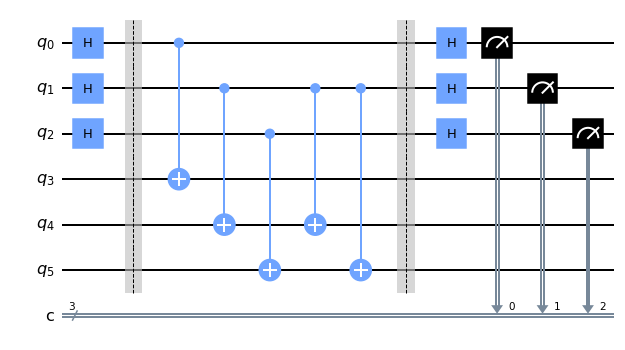

In [3]:
b = '110'

n = len(b)
simon_circuit = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuit.h(range(n))

# Apply barrier for visual separation
simon_circuit.barrier()

simon_circuit += simon_oracle(b)

# Apply barrier for visual separation
simon_circuit.barrier()

# Apply Hadamard gates to the input register
simon_circuit.h(range(n))

# Measure qubits
simon_circuit.measure(range(n), range(n))
simon_circuit.draw('mpl')

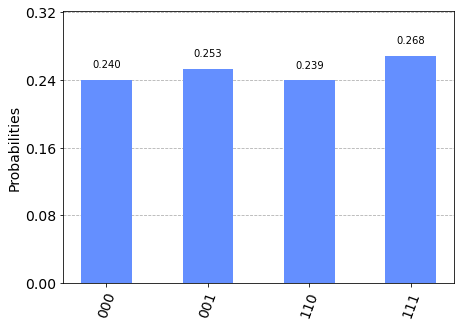

In [4]:
qasm_sim = Aer.get_backend('qasm_simulator')
shots = 1024
qobj = assemble(simon_circuit, shots=shots)
results = qasm_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [5]:
# Calculate the dot product of the results
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

for z in counts:
    print('{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)))

110.000 = 0 (mod 2)
110.001 = 0 (mod 2)
110.110 = 0 (mod 2)
110.111 = 0 (mod 2)
